#  Selenium 사용하기

* 크롬 115이상 버전부터 부터 드라이버 설치 불필요
* 셀레니움4 부터 문법 변경
* https://www.selenium.dev/documentation/

셀레니움으로는 스크래핑하면 너무 느리므로,
동적 웹페이지 접속 및 이벤트 발생 역할 만 하고,
파싱은 BS4를 쓰는게 좋다.

In [1]:
# 셀레니움 라이브러리 설치
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/3f/fd/c2e7bb547b5b96c7bd536b4a80c4564b7ce5cd38d10095fbba8648996ab9/selenium-4.18.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/14/fb/9299cf74953f473a15accfdbe2c15218e766bae8c796f2567c83bae03e98/trio-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing_extensions>=4.9.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
# options.add_argument("--start-maximized")
# options.add_argument("--headless=new") 
options.add_experimental_option("detach", True) #특정함수안에서  드라이버 생성시 함수종료될 때 브라우저 같이 종료되는 문제 대응

## 브라우저 실행 및 페이지 접속

In [ ]:
url = 'http://naver.com'
driver = webdriver.Chrome(options=options) # 객체 생성

driver.get(url) # 실행 

time.sleep(2) 

## 상호작용

In [ ]:
driver.back()

In [ ]:
driver.forward()

In [ ]:
driver.refresh()

## 페이지 정보 가져오기

In [ ]:
title = driver.title
url = driver.current_url
handle = driver.current_window_handle
print(title, url, handle)

## html 요소 찾기
네이버 검색창을 핸들링해보자
driver.find_element().send_keys()
```
<input id="query" name="query" type="search" title="검색어를 입력해 주세요." placeholder="검색어를 입력해 주세요." maxlength="255" autocomplete="off" class="search_input" data-atcmp-element="">
```

In [ ]:
driver.find_element?

In [ ]:
driver.find_element(By.ID, "query")

In [ ]:
# 키입력
driver.find_element(By.ID, "query").send_keys('뉴진스')

In [ ]:
driver.find_element(By.CLASS_NAME, "search_input").send_keys('블랙핑크')

In [ ]:
driver.find_element(By.NAME, "query").send_keys('르세라핌')

In [ ]:
driver.find_element(By.CSS_SELECTOR, ".search_input").send_keys('세븐틴')

In [ ]:
driver.find_element(By.CSS_SELECTOR, "#query").send_keys('에스파')

In [ ]:
driver.find_element(By.CSS_SELECTOR, "[title='검색어를 입력해 주세요.']").send_keys('트와이스')

In [ ]:
driver.find_element(By.CSS_SELECTOR, "[placeholder='검색어를 입력해 주세요.']").send_keys('트와이스')

In [ ]:
driver.find_element(By.XPATH,"//*[@id='query']").send_keys('BTS')

## 클릭
네이버 쇼핑 메뉴를 클릭해보자
driver.find_element().click()
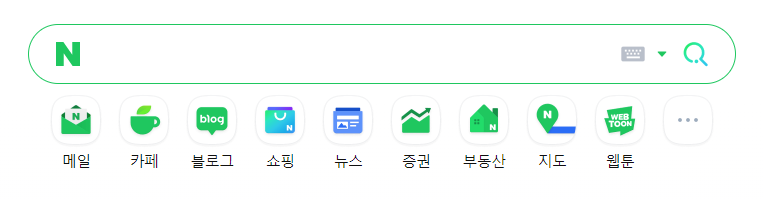

In [ ]:
driver.find_element(By.LINK_TEXT, '쇼핑')

In [ ]:
driver.find_element(By.LINK_TEXT, '쇼핑').click()

In [ ]:
# 일부 매칭
driver.find_element(By.PARTIAL_LINK_TEXT, '쇼').click()

In [ ]:
# 태그는 너무 요소가 많으므로, 정확하게 대상을 찾을 때에는 안씀
driver.find_element(By.TAG_NAME, 'div')

In [ ]:
# 여러개의 요소를찾을 때
links = driver.find_elements(By.CSS_SELECTOR, '.link_service')

In [ ]:
for link in links:
    print(link)

In [ ]:
# https://www.browserstack.com/guide/get-html-source-of-web-element-in-selenium-webdriver
# 해당 클래스가 속한 요소의 자식 html을 출력
for link in links:
    print(link.get_attribute("href")) 
    print()

## 자동 로그인 연습

In [ ]:
# 테스트용 html
url = 'file:///C:/workspace/python/WASSUP/02_Data_Collection/sample/signin.html'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(2) 

In [ ]:
username = driver.find_element(By.NAME, "username")
username.send_keys('korea')

In [ ]:
username = driver.find_element(By.NAME, "password")
username.send_keys('1004')

In [ ]:
login =  driver.find_element(By.XPATH, '//*[@id="loginForm"]/input[3]')
login.click()

In [ ]:
login =  driver.find_element(By.CSS_SELECTOR, "#loginForm > input[type=submit]:nth-child(5)")
login.click()

In [ ]:
login =  driver.find_element(By.CSS_SELECTOR, "[value='Login']")
login.click()

In [ ]:
driver.back()

In [ ]:
# 입력창 clear 하기
# 세션끊기면 다시 접근해야함
username = driver.find_element(By.NAME, "username")
username.clear()

In [ ]:
username.submit()

In [ ]:
driver.find_element(By.TAG_NAME, 'p').text

In [ ]:
# html 소스 가져오기
driver.page_source

In [ ]:
driver.close()

## options

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
options.add_argument("--headless=new") 
# options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
# options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
# options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
# options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
# options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
# options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
options.add_experimental_option("detach", True) #특정함수안에서  드라이버 생성시 함수종료될 때 브라우저 같이 종료되는 문제 대응

In [ ]:
url = 'http://naver.com'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(2)

In [ ]:
print(driver.title)

In [ ]:
driver.quit() # 탭 닫기

## 윈도우 컨트롤

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
# options.add_argument("--start-maximized")
# options.add_argument("--headless=new") 
options.add_experimental_option("detach", True) #

url = 'http://naver.com'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(2)

### 창의 너비/높이 구하기

In [ ]:
size = driver.get_window_size()
width = size.get("width")
height = size.get("height")

print(str(width)+"px"+" "+str(height)+"px")

### 창 크기 조절

In [ ]:
driver.set_window_size(800, 600)

### 스크린 상에서의 창 좌표

In [ ]:
position = driver.get_window_position()
x = position.get('x')
y = position.get('y')

print("x : "+str(x)+" "+"y : "+str(y))

In [ ]:
driver.set_window_position(10,10)

In [ ]:
# 창 크기 최대화
driver.maximize_window()

In [ ]:
# 창 크기 최소화
driver.minimize_window()

In [ ]:
# 전체 화면
driver.fullscreen_window()

In [ ]:
# 스크린 샷
driver.save_screenshot('./image.png')

In [ ]:
driver.close()

# 예제) 네이버 블로그

In [76]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time, random, pandas as pd

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [77]:
# 웹드라이버 로드
driver = webdriver.Chrome( options = options)

In [78]:
# 조건 설정
where = 'blog'
query = '인공지능'
dateform = '20221020to20231020'
url = f'https://search.naver.com/search.naver?where={where}&query={query}&sm=tab_op&nso=so:r,p:from{dateform}'
fname = f'{where}_{query}_{dateform}'

In [79]:
# url 접속
driver.get(url)
time.sleep(random.randint(2,3))

## excute_script()
자바스크립트 함수(스크롤다운) 실행하기
execute_script("스크립트", 요소)	해당 페이지에 스크립트를 만들 때 사용합니다. 요소는 필수 파라미터는 아니고 요소가 있으면 요소에 스크립트가 실행되고 없으면 전체 페이지에 스크립트가 움직입니다.
```
js코드를 인자로 넣을 수 있어 브라우저 화면을 제어 할수 있게 된다. 스크롤을 하기 위해 뿐만아니라 다른 동적이벤트를 작성할 수 있다.

* 화면상 스크롤 위치 이동 : scrollTo(x,Y) ,scrollTo(x,Y+number)
* 화면 최하단으로 스크롤 이동 : scrollTo(0, document.body.scrollHeight)
* 화면을 움직이고 페이지 로드 기다리기 : time.sleep(second)
* 함수 호출시 전달인자들이 배열 형태로 저장된 객체 : arguments 
    * (arguments[0].click(), sample)
    * sample요소의 첫번째 인자에 click()을 명령
```



In [80]:
#네이버 뷰는 최대 1050까지만 노출
# 스크롤 10번
for i in range(10):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(random.randint(2, 3))

In [81]:
# get_view()
views = driver.find_elements(By.CSS_SELECTOR, '.lst_view .bx')
result = []

for view in views:
    con_dict = {}
    con_dict['title'] = view.find_element(By.CSS_SELECTOR, '.title_link').text
    con_dict['text'] = view.find_element(By.CSS_SELECTOR, '.dsc_link').text
    con_dict['date'] = view.find_element(By.CSS_SELECTOR, '.sub').text
    result.append(con_dict)
    print(con_dict)
    
print('완료')

{'title': '엘지 휘센 인공지능스스로에어컨(FQ19P7DPAN) 누수현상 해결...', 'text': '엘지 인공지능스스로에어컨 분해방법은 해 보지 않으면 어렵고 당황스럽지만 막상 해 보면 쉽습니다. 다만 몇 가지 조심해야 할 부분이 있어 정리합니다. 먼저 엘지 휘센 인공기능스스로 에어컨의 전원 플러그는 실외기에서 공급을 받으니 실외기 쪽으로 가셔서 전원 플러글...', 'date': '2023.08.09.'}
{'title': '로보어드바이저 수익률 비교, 인공지능 투자 성과는?', 'text': '그럼 인공지능인 로보어드바이저와 일반 펀드의 운용 성과는 어땠을까요? 2022년 펀드 운용 성과 2022년 우리나라 국민의 일반펀드 평균... 저도 그렇지만 인공지능이 운용하는 상품을 찾고 계신 분들도 의외로 많습니다. 제가 현재 가입하고 있다는 이야기를 하면 대부분의...', 'date': '2023.09.26.'}
{'title': '[종목분석] 의료 인공지능 딥노이드 주가 전망을 살펴봅니다', 'text': '그 중에서 오늘은 인공지능 딥노이드 주가를 살펴보려고 하는데 해당 종목은 이미 많이 상승한 상태입니다. 그렇다고 버릴 수는... ▣인공지능이란 AI는 Artificial Intelligence의 약자로 인간의 지적능력을 컴퓨터를 통해 구현하는 과학기술입니다. 4차 산업혁명으로 국내 뿐만...', 'date': '2023.08.30.'}
{'title': 'AI 인공지능 파이토치 서적으로 가볍게 시작해보죠', 'text': '인공지능이 표면적으로 한풀 꺽였다고는 하지만 관련된 서적과 툴들은 꾸준하게 발전하고 있습니다. 언어모델 개발뿐만 아니랄 이를... 10. 인공지능과 코딩 프로그래밍이라는 단어아래 후끈한 이 시장에 알고 있어야 사람을 구하고 일도 시킬 수 있어서 오늘도 공부를 해야 하네요...', 'date': '2023.10.02.'}
{'title': 'NPU 관련주 뜻 - 인공지능 구글 텔레칩스 칩스앤미디어 주가 전망', 'text': '

In [82]:
#저장된 게시물 리스트를 데이터프레임으로 변환후 csv로 저장
df = pd.DataFrame(result)
df

,title,text,date
0,엘지 휘센 인공지능스스로에어컨(FQ19P7DPAN) 누수현상 해결...,엘지 인공지능스스로에어컨 분해방법은 해 보지 않으면 어렵고 당황스럽지만 막상 해 보...,2023.08.09.
1,"로보어드바이저 수익률 비교, 인공지능 투자 성과는?",그럼 인공지능인 로보어드바이저와 일반 펀드의 운용 성과는 어땠을까요? 2022년 펀...,2023.09.26.
2,[종목분석] 의료 인공지능 딥노이드 주가 전망을 살펴봅니다,그 중에서 오늘은 인공지능 딥노이드 주가를 살펴보려고 하는데 해당 종목은 이미 많이...,2023.08.30.
3,AI 인공지능 파이토치 서적으로 가볍게 시작해보죠,인공지능이 표면적으로 한풀 꺽였다고는 하지만 관련된 서적과 툴들은 꾸준하게 발전하고...,2023.10.02.
4,NPU 관련주 뜻 - 인공지능 구글 텔레칩스 칩스앤미디어 주가 전망,NPU 관련주 뜻 - 인공지능 구글 텔레칩스 칩스앤미디어 주가 전망 NPU 뜻 NP...,2023.10.09.
...,...,...,...
325,로봇 강아지 인공지능 AI의 루나 로봇 강아지첫만남 후기,얼리어답터 리뷰/IT정보 로봇 강아지 인공지능 AI의 루나 로봇 강아지첫만남 후기 ...,2023.08.29.
326,인공지능 마케팅이란? 데이터를 활용해야하는 이유! SNS...,AI를 활용한 인공지능 마케팅은 어떤식으로 할 수 있을까요? 오늘은 인공지능 마케팅...,2023.06.22.
327,"안내] 인공지능 빙, 바드, 챗GPT, 클로바X 활용스타벅스 vs...",인공지능과 빅데이터 활용 상권분석 전문가 김영갑 교수입니다. 이미 공지하여 드렸던 ...,2023.10.03.
328,'ai vs 인간'.. 인공지능 공부하면서 얻은 질문 11가지,"같은 인공 생명체) © comparefibre, 출처 Unsplash 사람들은 ai...",2023.09.19.


In [83]:
#데이터 프레임 저장
# csv는 sep 쉼표가 반드시 있어야 한글이 안깨짐
df.to_csv(f'./naver_{fname}.csv', sep=',', encoding='utf-8-sig')

## 예제) 구글 플레이 스토어 리뷰

In [128]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time, random, pandas as pd

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

driver = webdriver.Chrome( options = options)
url = 'https://play.google.com/store/apps/details?id=com.estsoft.picnic'
driver.get(url)
time.sleep(random.randint(2,3))

In [129]:
# 리뷰 더보기 클릭
xpath = '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[2]/div[2]/div/div[1]/div[1]/c-wiz[4]/section/div/div[2]/div[5]/div/div/button/span'
driver.find_element(By.XPATH, xpath).click()
time.sleep(random.randint(2, 3))

In [130]:
# 스크롤
for i in range(10):
    review_box = driver.find_element(By.CSS_SELECTOR, 'div.fysCi')
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', review_box )
    time.sleep(random.randint(2, 3))

In [131]:
reviews = driver.find_elements(By.CSS_SELECTOR, 'div.RHo1pe')
reviews

[<selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2236")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2312")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2388")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2464")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2537")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb4027f79a720be216560", element="6005B1010E1BA7355B4DA2AD3AF36B6D_element_2610")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9d0805131f4bb402

In [132]:
len(reviews)

40

In [133]:
# 요소별 추출
def get_content(review):
    condic = {}
    condic['text'] = review.find_element(By.CSS_SELECTOR, 'div.h3YV2d').text
    condic['rat'] = len(review.find_elements(By.CSS_SELECTOR, 'span.Z1Dz7b'))
    condic['date'] = review.find_element(By.CSS_SELECTOR, 'span.bp9Aid').text
    return condic

In [134]:
result = [get_content(review) for review in reviews]

In [127]:
df = pd.DataFrame(result)
df

,text,rat,date
0,일단 정말 잘 사용하고 있구요!감사합니다! 다만 최근 AI기능 on off가 있어서...,4,2019년 2월 26일
1,"오늘 처음깔고 후기를 남겨봅니다 :) 필터도 다양하고 , 예쁜 필터들이 많습니다 !...",4,2021년 5월 7일
2,배경이 자연스럽게 들어가 흐린날에도 사진찍기 좋고 필터 하나하나 색감도 너무 마음에...,5,2019년 2월 4일
3,많고 많은 필터어플들이 개성은 별로 없는편인데 피크닉은 독보적인 필터들이 많아서 계...,5,2019년 4월 14일
4,진짜 이 앱은 남이 알까 무서울 정도로 좋은 앱이네요ㅠㅜㅜ 사진이 세상 예쁘게 되고...,4,2019년 6월 1일
...,...,...,...
435,정말 좋은 사진필터 앱 이에용❗정말 강추 드립니다〰그리고 광고도 없어서 좋아욥🎀,5,2020년 2월 15일
436,아이폰쓸때는 필터보정어플 많아서 그냥 야외샷보정 할 때만 사용했었는데 와 갤럭시와서...,5,2018년 12월 28일
437,와....진짜 너무 좋아요 취미가 사진찍긴데 너무 예쁘게 찍혀요👍🏻,5,2020년 3월 18일
438,방금 3장 필터 씌워봤거든요? 이거 제 인생앱입니다 이제 기본카메라로 뒤지게 찍고 ...,5,2019년 3월 28일


# 예제) 대한민국 지역 여행기사 수집
예제 페이지 URL https://korean.visitkorea.or.kr/search/search_list.do?keyword=%EC%A0%9C%EC%A3%BC%EB%8F%84

In [60]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import math, time

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [61]:
search = input('검색어를 입력하세요.')

검색어를 입력하세요.서울


In [62]:
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search

driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(3)

```
<a href="javascript:;" onclick="viewChange('recommend');">더보기</a>
```

In [63]:
# 여행기사 더보기 클릭
# driver.find_element(By.CSS_SELECTOR, ".more_view > a").click()
driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()

In [64]:
result = driver.find_elements(By.CSS_SELECTOR, '.tit a')
result[0].text

''

In [65]:
a = driver.find_element(By.XPATH, '//*[@id="search_result"]/ul/li[1]/div[1]/div[1]/a')
a.text

'서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스'

In [66]:
# tit_xpath = '//*[@id="search_result"]/ul/li/div/div/a' # 해당 요소가 하나씩일 때
tit_xpath = '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a'
result = driver.find_elements(By.XPATH, tit_xpath)
len(result), result[0].text, result[1].text

(10, '서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스', '자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관')

In [67]:
for i, title in enumerate(result, 1):
#     print(i, title.text)
    print(i, title.text)

1 서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
2 자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
3 소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
4 낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
5 한가로운 여행, 책과 서울
6 다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
7 높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
8 대중교통으로 만나는 무장애 여행 '서울 600년'
9 숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
10 할머니와 손주가 함께 떠나는 가을날의 서울


## 페이지 이동
```
1 : 수집 갯수를 입력받는다.
2 : 수집 갯수에 따라 페이지를 이동한다.
3 : 각 페이지별 데이터를 수집한다. (타이틀 텍스트)
4 : 출력
```

In [56]:
# 페이지 버튼 클릭
driver.find_element(By.XPATH, '/html/body/div[3]/div/div[1]/div[15]/a[2]').click()

In [69]:
cnt = int(input('크롤링 할 건수는 몇건입니까?: '))
cnt

크롤링 할 건수는 몇건입니까?: 15


15

In [70]:
page_cnt = math.ceil(cnt / 10) # 크롤링 할 전체 페이지 수 (올림)
print(page_cnt)

2


In [59]:
tit_xpath = '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a'
no = 0

for x in range(1, page_cnt+1):
    print(f'========= {x} 페이지 작업 =========')
    mylist = driver.find_elements(By.XPATH, tit_xpath)
    
    for item in mylist:
        no += 1
        if no > cnt:
            break
        print(no, item.text)
    
    if no <= cnt:
        a = f'/html/body/div[3]/div/div[1]/div[15]/a[{x+1}]'
        driver.find_element(By.XPATH, a).click()
#         next_button = driver.find_element(By.CSS_SELECTOR, f"a[id='{x+1}']")
#         driver.execute_script("arguments[0].click();", next_button)
        time.sleep(2)
    
print('========= 작업 완료 =========')
# driver.close()

========= 1 페이지 작업 =========
1 당신을 위로해 줄 한잔, 서울 수제맥줏집
2 그리고 그것들은 행복하게 다시 쓰였습니다, 세운상가와 서울새활용플라자
3 서울 수제버거 맛집 5선
4 한 곳에서 끝내자! 서울 복합문화공간 4
5 서울 지하철 타고 도심 속으로 일출 여행 간다
6 인생사진 찍기 좋은 서울&경기 가을꽃 컬렉션
7 맥주 덕후가 사랑한 서울 수제맥주 브루펍 3
8 브라보 마이 잉여 라이프! 집순이도 반할 서울 잉여력 상승 스팟 5
9 혼자만의 시간,
여유롭게 즐기는 서울의 작은 책방 3
10 관광정보 웹툰 「조선손님유람기」
28화 서울밤도깨비야시장 편
========= 2 페이지 작업 =========
11 당신을 위로해 줄 한잔, 서울 수제맥줏집
12 그리고 그것들은 행복하게 다시 쓰였습니다, 세운상가와 서울새활용플라자
13 서울 수제버거 맛집 5선
14 한 곳에서 끝내자! 서울 복합문화공간 4
15 서울 지하철 타고 도심 속으로 일출 여행 간다
========= 작업 완료 =========


In [73]:
# xpath대신 execute_script함수 사용
tit_xpath = '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a'
no = 0

for x in range(1, page_cnt+1):
    print(f'========= {x} 페이지 작업 =========')
    mylist = driver.find_elements(By.XPATH, tit_xpath)
    
    for item in mylist:
        no += 1
        if no > cnt:
            break
        print(no, item.text)
    
    if no <= cnt:
        next_button = driver.find_element(By.CSS_SELECTOR, f"a[id='{x+1}']")
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(2)
        
print('========= 작업 완료 =========')
driver.close()

========= 1 페이지 작업 =========
1 서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
2 자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
3 소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
4 낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
5 한가로운 여행, 책과 서울
6 다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
7 높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
8 대중교통으로 만나는 무장애 여행 '서울 600년'
9 숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
10 할머니와 손주가 함께 떠나는 가을날의 서울
========= 2 페이지 작업 =========
11 당신을 위로해 줄 한잔, 서울 수제맥줏집
12 그리고 그것들은 행복하게 다시 쓰였습니다, 세운상가와 서울새활용플라자
13 서울 수제버거 맛집 5선
14 한 곳에서 끝내자! 서울 복합문화공간 4
15 서울 지하철 타고 도심 속으로 일출 여행 간다
========= 작업 완료 =========


## 특정 게시글의 상세 정보 추출하기
예제 페이지 주소  
https://korean.visitkorea.or.kr/detail/rem_detail.html?cotid=be3db10c-b642-409c-81cc-c4cdecb5bd8b&temp=

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import math, time

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [2]:
URL = 'https://korean.visitkorea.or.kr/detail/rem_detail.html?cotid=be3db10c-b642-409c-81cc-c4cdecb5bd8b&temp='

driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(3)

In [5]:
# 제목 추출
title = driver.find_element(By.ID, 'topTitle').text
title

'향긋한 굴구이, 시원한 대구탕과 함께 하는 겨울 거제여행'

In [7]:
contents = driver.find_elements(By.CLASS_NAME, 'txt_p')
print(contents[0].text)
print(contents)

찬바람이 불기 시작하는 이 즈음이면 전국의 포구는 미식가들로 붐비기 시작한다. 겨울이면 한껏 기름기가 오르는 생선이며 조개를 맛보려는 미식가들의 발걸음으로 유명식당 문턱이 닳는다. 도루묵이며 숭어 등등 겨울이면 맛이 드는 여러 해산물 중에서도 최고의 맛을 꼽으라면 단연 굴과 대구가 아닐까. 향긋한 굴구이와 시원하면서도 얼큰한 대구탕 한 그릇이면 코끝을 얼리는 차가운 겨울 바람이 오히려 고맙게 느껴진다.
[<selenium.webdriver.remote.webelement.WebElement (session="23b0ed7233ad01dd021c4e0882dafc82", element="21E0DA18B42D1EF9F825CF886D026771_element_304")>, <selenium.webdriver.remote.webelement.WebElement (session="23b0ed7233ad01dd021c4e0882dafc82", element="21E0DA18B42D1EF9F825CF886D026771_element_52")>, <selenium.webdriver.remote.webelement.WebElement (session="23b0ed7233ad01dd021c4e0882dafc82", element="21E0DA18B42D1EF9F825CF886D026771_element_310")>, <selenium.webdriver.remote.webelement.WebElement (session="23b0ed7233ad01dd021c4e0882dafc82", element="21E0DA18B42D1EF9F825CF886D026771_element_314")>, <selenium.webdriver.remote.webelement.WebElement (session="23b0ed7233ad01dd021c4e0882dafc82", element="21E0DA18B42D1EF9F825CF886D026771_element_318")>, <selenium.web

In [8]:
# 내용 추출
contents = driver.find_elements(By.CLASS_NAME, 'txt_p')

contents_list = []
for item in contents:
    contents_list.append(item.text)
contents_list

['찬바람이 불기 시작하는 이 즈음이면 전국의 포구는 미식가들로 붐비기 시작한다. 겨울이면 한껏 기름기가 오르는 생선이며 조개를 맛보려는 미식가들의 발걸음으로 유명식당 문턱이 닳는다. 도루묵이며 숭어 등등 겨울이면 맛이 드는 여러 해산물 중에서도 최고의 맛을 꼽으라면 단연 굴과 대구가 아닐까. 향긋한 굴구이와 시원하면서도 얼큰한 대구탕 한 그릇이면 코끝을 얼리는 차가운 겨울 바람이 오히려 고맙게 느껴진다.',
 '거제는 굴구이와 대구요리 등 싱싱한 겨울 해산물을 맛볼 수 있는 대표적인 겨울별미 여행지다. 별미여행의 시작은 거제면 내간리에 자리한 굴구이집이다. 굴하면 이웃한 통영을 떠올리지만, 거제에서도 통영 못지 않게 굴이 많이 생산된다. 통영에서 신거제대교를 넘어 호곡, 녹산, 법동 등지를 지나 거제면 내간리까지 이어지는 1018번 지방도로를 따라가다 보면 해안가에 굴양식을 위한 지주들이 끝 간 데 없이 꽂혀 있는 것을 볼 수 있다. 바다 위에는 가지런히 떠있는 투하식 굴양식장의 부표들도 장관을 이루고 있다.',
 '거제 사람들은 굴을 주로 구이로 먹는다. 예전에 굴을 캐던 사람들이 모닥불을 피우고 구워먹던 것이 세월이 흘러 자연스럽게 상품화가 됐다고 한다. 내간리 해안가에 굴구이를 내는 집이 모여있다. 굴구이를 주문하면 맛보기로 생굴이 나오고 곧 이어 굴튀김과 굴무침이 가득 담긴 접시도 놓여진다. 고추, 파와 함께 바삭하게 튀긴 굴튀김은 일식집에서 맛보던 그것과는 또 다른 맛을 낸다. 매콤한 맛이 이마와 콧등에 송글송글 땀을 맺히게 한다. 각종 야채와 함께 버무려진 굴무침도 매우면서도 새콤한 맛으로 젓가락질을 바쁘게 만든다.',
 '굴무침과 굴튀김을 다 먹을 때면 커다란 철판 하나가 불 위에 올려진다.  뚜껑을 열어보면 껍질을 까지 않은 생굴이 가득 담겨있다. 가장자리에 검은 테두리가 선명한데, 이는 굴이 싱싱하다는 증거기도 하다. 거제 굴구이는 구우면서 동시에 찌는 방식. 다 익기까지는 5분 정도가 걸리는데, 장갑을 끼고 칼로 껍질을 까서 먹는다.',
 

In [9]:
# 하나의 문자열로 통합
contents_merge = ' '.join(contents_list) 
contents_merge

'찬바람이 불기 시작하는 이 즈음이면 전국의 포구는 미식가들로 붐비기 시작한다. 겨울이면 한껏 기름기가 오르는 생선이며 조개를 맛보려는 미식가들의 발걸음으로 유명식당 문턱이 닳는다. 도루묵이며 숭어 등등 겨울이면 맛이 드는 여러 해산물 중에서도 최고의 맛을 꼽으라면 단연 굴과 대구가 아닐까. 향긋한 굴구이와 시원하면서도 얼큰한 대구탕 한 그릇이면 코끝을 얼리는 차가운 겨울 바람이 오히려 고맙게 느껴진다. 거제는 굴구이와 대구요리 등 싱싱한 겨울 해산물을 맛볼 수 있는 대표적인 겨울별미 여행지다. 별미여행의 시작은 거제면 내간리에 자리한 굴구이집이다. 굴하면 이웃한 통영을 떠올리지만, 거제에서도 통영 못지 않게 굴이 많이 생산된다. 통영에서 신거제대교를 넘어 호곡, 녹산, 법동 등지를 지나 거제면 내간리까지 이어지는 1018번 지방도로를 따라가다 보면 해안가에 굴양식을 위한 지주들이 끝 간 데 없이 꽂혀 있는 것을 볼 수 있다. 바다 위에는 가지런히 떠있는 투하식 굴양식장의 부표들도 장관을 이루고 있다. 거제 사람들은 굴을 주로 구이로 먹는다. 예전에 굴을 캐던 사람들이 모닥불을 피우고 구워먹던 것이 세월이 흘러 자연스럽게 상품화가 됐다고 한다. 내간리 해안가에 굴구이를 내는 집이 모여있다. 굴구이를 주문하면 맛보기로 생굴이 나오고 곧 이어 굴튀김과 굴무침이 가득 담긴 접시도 놓여진다. 고추, 파와 함께 바삭하게 튀긴 굴튀김은 일식집에서 맛보던 그것과는 또 다른 맛을 낸다. 매콤한 맛이 이마와 콧등에 송글송글 땀을 맺히게 한다. 각종 야채와 함께 버무려진 굴무침도 매우면서도 새콤한 맛으로 젓가락질을 바쁘게 만든다. 굴무침과 굴튀김을 다 먹을 때면 커다란 철판 하나가 불 위에 올려진다.  뚜껑을 열어보면 껍질을 까지 않은 생굴이 가득 담겨있다. 가장자리에 검은 테두리가 선명한데, 이는 굴이 싱싱하다는 증거기도 하다. 거제 굴구이는 구우면서 동시에 찌는 방식. 다 익기까지는 5분 정도가 걸리는데, 장갑을 끼고 칼로 껍질을 까서 먹는다. 굴껍질을 까보면 육즙이 가득 

# 이미지 스크래핑

예제 사이트  
https://korean.visitkorea.or.kr/detail/rem_detail.html?cotid=be3db10c-b642-409c-81cc-c4cdecb5bd8b&temp=

In [10]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time, urllib.request

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [11]:
URL = "https://korean.visitkorea.or.kr/detail/rem_detail.html?cotid=be3db10c-b642-409c-81cc-c4cdecb5bd8b&temp="
driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(2)

In [12]:
import os
os.getcwd()

'C:\\workspace\\python\\WASSUP\\02_Data_Collection'

In [13]:
f_dir = input('이미지 저장 폴더명 : ')

now = time.localtime()
s = '%04d%02d%02d_%02d%02d%02d'%(now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)
f_dir = f_dir +'_' + s
os.makedirs(os.getcwd()+'\\' + f_dir)

이미지 저장 폴더명 : images


In [14]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

이미지 추출하여 저장하기 
- 웹페이지에 따라 트래픽절약을 위해 스크롤시에 이미지를 불러오도록 처리되는 경우가 있음

In [15]:
html_src = driver.page_source

In [16]:
html_dom = BeautifulSoup(html_src, 'lxml')
html_dom

<html lang="ko"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-RSGGQ7395J&amp;cx=c&amp;_slc=1" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-6FHD6PPZEF&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-4XLNR00KRE&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no" name="viewport"/>
<title>향긋한 굴구이, 시원한 대구탕과 함께 하는 겨울 거제여행&gt; 여행기사 | 추천! 가볼만한곳:대한민국 구석구석 </title>
<meta content=" 찬바람이 불기 시작하는 이 즈음이면 전국의 포구는 미식가들로 붐비기 시작한다. 겨울이면 한껏 기름기가 오르는 생선이며 조개를 맛보려는 미식가들의 발걸음으로 유명식당 문턱이 닳는다. 도루묵이며 숭어 등등 겨울이면 맛이 드는 여러 해산물 중에서도 최고의 맛을 꼽으라면 단연 굴과 대구가 아닐까. 향긋한 굴구이와 

In [17]:
mylist = html_dom.select('.img_typeBox img')
mylist

[<img alt="굴구이" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=7ee736d9-5afa-471a-976d-42da60a69a51"/>,
 <img alt="거제에서 쉽게 볼 수 있는 굴 양식장" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=2498f000-e891-4fff-8f5c-f42feda60e6b"/>,
 <img alt="굴무침" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=08ea1346-7aa5-4460-94aa-c262d05c0af8"/>,
 <img alt="굴구이 먹을 때 사용하는 칼과 장갑" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=0501f778-7fef-44b4-b5b4-1714d8348c2a"/>,
 <img alt="거제의 겨울 별미 굴구이" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=638ea611-96fe-465e-a3af-ee22710e8a3e"/>,
 <img alt="대구회무침" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=fe302acf-edb3-41c0-92b7-6ab64da64f9d"/>,
 <img alt="국물이 진한 대구탕" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=c3444011-2e4b-4fe1-98df-14384a4eacf1"/>,
 <img alt="대구 말리기" src="https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&amp;id=df22aa2d-363c-4ac6-8496-2db36178fa62"/>,
 <img alt="대구찜" s

In [18]:
img_list = [item['src'] for item in mylist]
img_list

['https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=7ee736d9-5afa-471a-976d-42da60a69a51',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=2498f000-e891-4fff-8f5c-f42feda60e6b',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=08ea1346-7aa5-4460-94aa-c262d05c0af8',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=0501f778-7fef-44b4-b5b4-1714d8348c2a',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=638ea611-96fe-465e-a3af-ee22710e8a3e',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=fe302acf-edb3-41c0-92b7-6ab64da64f9d',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=c3444011-2e4b-4fe1-98df-14384a4eacf1',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=df22aa2d-363c-4ac6-8496-2db36178fa62',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=4266d538-7467-4468-9a37-297b682c30cd',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=faac52a9-e79e-4eb7-ae09-8222fa1c6a9c',
 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=2c1069d4-fa23-4cf8-907f-8548a3189ea2',

In [20]:
urllib.request.urlretrieve(img_list[0],  'image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x27d087ff5d0>)

In [21]:
no = 0
for src in img_list:
    # 다운로드  (주소, 파일이름)
    urllib.request.urlretrieve(src, f'{f_dir}\\{no}.jpg')
    no += 1

# 파일 스크래핑
예제 사이트 : KRX(한국증권거래소)사이트에 있는 상장종목 주요기록   
http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0301
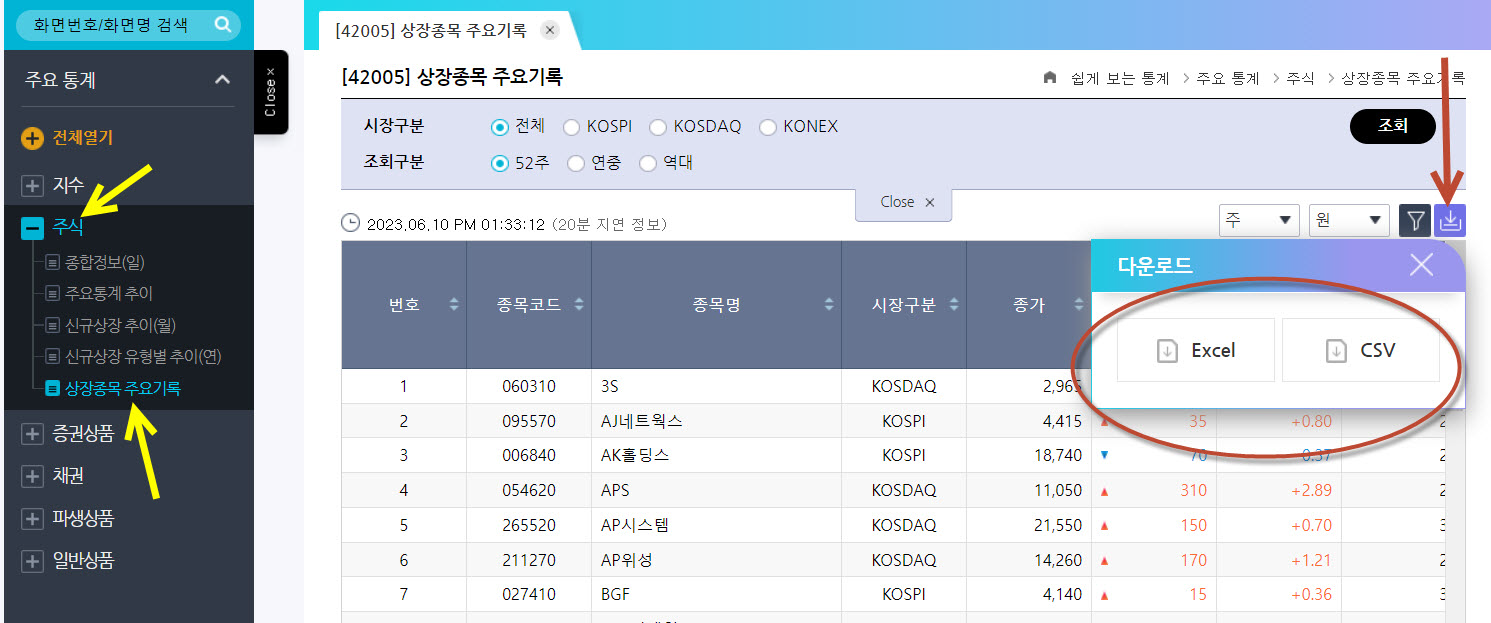

In [22]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [23]:
import os
f_dir = 'stock'
os.makedirs(os.getcwd()+'\\' + f_dir)

driver = webdriver.Chrome(options=options)
URL = 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0301'  
driver.get(URL)

In [24]:
driver.find_element(By.LINK_TEXT, '주식').click()

In [25]:
driver.find_element(By.LINK_TEXT, '상장종목 주요기록').click()

라디오버튼 클릭하기

In [35]:
market = driver.find_element(By.ID, 'mktId_0_1')
market

<selenium.webdriver.remote.webelement.WebElement (session="8d39fe588852d831a202670f9c2e0613", element="D1B1197026F04404A95D5447ACC3A403_element_6565")>

In [ ]:
# market.click() # 에러 ㅜㅜ
# market.send_keys(Keys.ENTER) # 안됨 ㅜㅜ

In [36]:
# 자바스크립트 명령을 써야 한다.
driver.execute_script('arguments[0].click()', market)

In [34]:
market = driver.find_element(By.CSS_SELECTOR, "[for='mktId_0_1']").click()

In [37]:
market.is_selected()

True

   
전체 / KOSPI / KOSDAQ / KONEX  라디오 버튼 선택하기

In [38]:
idx1 = int(input(' 0.전체      1.KOSPI     2.KOSDAQ    3.KONEX  ==> 시장 번호 선택:  '))
idx2 = int(input(' 0.Excel 파일로 저장      1. CSV 파일로 저장   ==> 파일 형식 선택:  '))

 0.전체      1.KOSPI     2.KOSDAQ    3.KONEX  ==> 시장 번호 선택:  1
 0.Excel 파일로 저장      1. CSV 파일로 저장   ==> 파일 형식 선택:  1


In [39]:
market_type = ['mktId_0_0','mktId_0_1', 'mktId_0_2', 'mktId_0_3']
market = driver.find_element(By.ID, market_type[idx1])

In [40]:
driver.execute_script('arguments[0].click()', market)
market.is_selected()

True

조회 버튼 클릭하기

In [41]:
driver.find_element(By.ID, 'jsSearchButton').click()

다운로드 버튼 클릭하기

In [42]:
driver.find_element(By.CLASS_NAME, 'CI-MDI-UNIT-DOWNLOAD').click()

파일 버튼 클릭하기

In [43]:
file_type =['Excel', 'CSV']
driver.find_element(By.LINK_TEXT, file_type[idx2]).click()

In [44]:
driver.close()